In [41]:
from pipeline.load import MyDataset, get_dataloader
from matplotlib import pyplot as plt
import numpy as np
import requests
import pandas as pd
import json
import os
import pdb
import seaborn as sns

In [14]:
CITY_REGIONS = {
    'znz': {
        '076995': 1701,
        '75cdfa': 2304,
        '425403': 1444,
        '33cae6': 1106,
        '06f252': 2387,
        'e52478': 601,
        'c7415c': 1346,
        'bc32f1': 1521,
        '3f8360': 1086,
        'aee7fd': 1521,
        '9b8638': 1482,
        'bd5c14': 1369,
        '3b20d4': 1849},
    'dar': {
        '353093': 1364,
        'f883a0': 4094,
        '0a4c40': 1604,
        '42f235': 2257,
        'a017f9': 1642,
        'b15fce': 1395},
    'acc': {
        '665946': 6982,
        'a42435': 1318,
        'ca041a': 1566,
        'd41d81': 737},
    'ptn': {'abe1a3': 31, 'f49f31': 13},
    'kam': {'4e7c7f': 868},
    'mon': {
        '401175': 192,
        '493701': 280,
        'f15272': 205,
        '207cc7': 126},
    'nia': {'825a50': 65}
    }

In [26]:
metadata = pd.read_csv('https://s3.amazonaws.com/drivendata/data/60/public/train_metadata.csv')
metadata['sceneid'] = metadata['img_uri'].apply(lambda x: x.split('/')[-1].split('.')[0])
metadata

,img_uri,label_uri,area,tier,sceneid
0,train_tier_1/acc/665946/665946.tif,train_tier_1/acc/665946-labels/665946.geojson,acc,1,665946
1,train_tier_1/acc/a42435/a42435.tif,train_tier_1/acc/a42435-labels/a42435.geojson,acc,1,a42435
2,train_tier_1/acc/ca041a/ca041a.tif,train_tier_1/acc/ca041a-labels/ca041a.geojson,acc,1,ca041a
3,train_tier_1/acc/d41d81/d41d81.tif,train_tier_1/acc/d41d81-labels/d41d81.geojson,acc,1,d41d81
4,train_tier_1/mon/401175/401175.tif,train_tier_1/mon/401175-labels/401175.geojson,mon,1,401175
...,...,...,...,...,...
67,train_tier_2/mah/5fe2d3/5fe2d3.tif,train_tier_2/mah/5fe2d3-labels/5fe2d3.geojson,mah,2,5fe2d3
68,train_tier_2/kin/10d200/10d200.tif,train_tier_2/kin/10d200-labels/10d200.geojson,kin,2,10d200
69,train_tier_2/kin/255028/255028.tif,train_tier_2/kin/255028-labels/255028.geojson,kin,2,255028
70,train_tier_2/nia/982a1f/982a1f.tif,train_tier_2/nia/982a1f-labels/982a1f.geojson,nia,2,982a1f


In [91]:
region_scores

,region,img_name,iou_score,area,sceneid
0,076995,076995_34816_37888_i.jpg,100.000000,znz,076995
1,076995,076995_5120_23552_i.jpg,100.000000,znz,076995
2,076995,076995_23552_9216_i.jpg,100.000000,znz,076995
3,076995,076995_34816_24576_i.jpg,100.000000,znz,076995
4,076995,076995_27648_6144_i.jpg,100.000000,znz,076995
...,...,...,...,...,...
3126,825a50,825a50_5120_5120_i.jpg,60.730041,nia,825a50
3127,825a50,825a50_4096_2048_i.jpg,100.000000,nia,825a50
3128,825a50,825a50_12288_3072_i.jpg,100.000000,nia,825a50
3129,825a50,825a50_5120_2048_i.jpg,0.000000,nia,825a50


In [92]:
region_scores = pd.read_csv('region_scores.csv')
region_scores = region_scores[region_scores.iou_score != 'iou_score']
region_scores = region_scores[region_scores.img_name != 'avg_loss']
region_scores['iou_score'] = pd.to_numeric(region_scores['iou_score'])
region_scores = pd.merge(region_scores, metadata[["area", "sceneid"]],left_on='region', right_on="sceneid")
region_scores

,region,img_name,iou_score,area,sceneid
0,076995,076995_34816_37888_i.jpg,100.000000,znz,076995
1,076995,076995_5120_23552_i.jpg,100.000000,znz,076995
2,076995,076995_23552_9216_i.jpg,100.000000,znz,076995
3,076995,076995_34816_24576_i.jpg,100.000000,znz,076995
4,076995,076995_27648_6144_i.jpg,100.000000,znz,076995
...,...,...,...,...,...
3095,825a50,825a50_9216_0_i.jpg,100.000000,nia,825a50
3096,825a50,825a50_5120_5120_i.jpg,60.730041,nia,825a50
3097,825a50,825a50_4096_2048_i.jpg,100.000000,nia,825a50
3098,825a50,825a50_12288_3072_i.jpg,100.000000,nia,825a50


In [100]:
region_scores[region_scores.iou_score == 0]

,region,img_name,iou_score,area,sceneid
14,076995,076995_8192_20480_i.jpg,0.0,znz,076995
307,33cae6,33cae6_5120_21504_i.jpg,0.0,znz,33cae6
630,c7415c,c7415c_41984_22528_i.jpg,0.0,znz,c7415c
661,c7415c,c7415c_31744_15360_i.jpg,0.0,znz,c7415c
778,bc32f1,bc32f1_31744_1024_i.jpg,0.0,znz,bc32f1
...,...,...,...,...,...
3046,825a50,825a50_3072_7168_i.jpg,0.0,nia,825a50
3049,825a50,825a50_6144_1024_i.jpg,0.0,nia,825a50
3053,825a50,825a50_3072_7168_i.jpg,0.0,nia,825a50
3055,825a50,825a50_5120_6144_i.jpg,0.0,nia,825a50


In [5]:
region_scores.dtypes

region       object
img_name     object
iou_score    object
dtype: object

Score averages by region

In [93]:
area_region_scores = region_scores.groupby('region').aggregate({
#     'region': 'min',
    'area': 'max',
    'iou_score': 'mean'
}).reset_index()

In [94]:
area_region_scores

,region,area,iou_score
0,06f252,znz,97.578674
1,076995,znz,96.811164
2,0a4c40,dar,62.643441
3,207cc7,mon,82.750196
4,33cae6,znz,83.293161
5,353093,dar,55.488840
6,3b20d4,znz,97.629316
7,3f8360,znz,95.370078
8,401175,mon,69.013286
9,425403,znz,99.047161


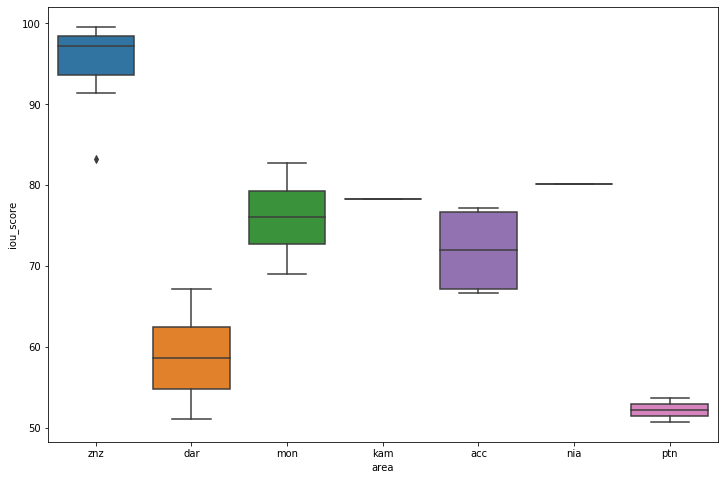

In [95]:
plt.subplots(figsize=(12,8))
sns.boxplot(x='area',y='iou_score', data=area_region_scores);

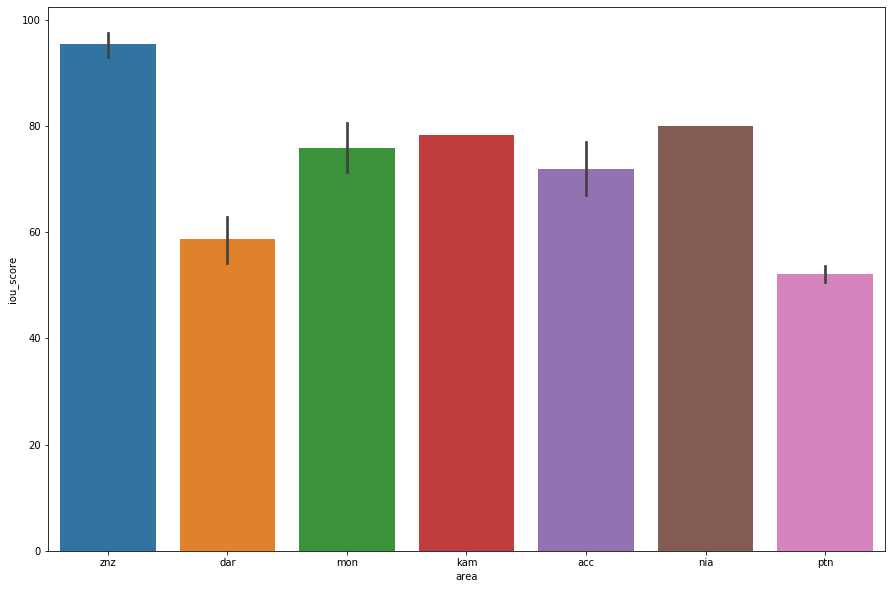

In [96]:
plt.subplots(figsize=(15,10))
sns.barplot(x='area',y='iou_score', data=area_region_scores);

In [ ]:
CITY_REGIONS = {
    'znz': {
        '076995': 1701,
        '75cdfa': 2304,
        '425403': 1444,
        '33cae6': 1106,
        '06f252': 2387,
        'e52478': 601,
        'c7415c': 1346,
        'bc32f1': 1521,
        '3f8360': 1086,
        'aee7fd': 1521,
        '9b8638': 1482,
        'bd5c14': 1369,
        '3b20d4': 1849},
    'dar': {
        '353093': 1364,
        'f883a0': 4094,
        '0a4c40': 1604,
        '42f235': 2257,
        'a017f9': 1642,
        'b15fce': 1395},
    'acc': {
        '665946': 6982,
        'a42435': 1318,
        'ca041a': 1566,
        'd41d81': 737},
    'ptn': {'abe1a3': 31, 'f49f31': 13},
    'kam': {'4e7c7f': 868},
    'mon': {
        '401175': 192,
        '493701': 280,
        'f15272': 205,
        '207cc7': 126},
    'nia': {'825a50': 65}
    }

In [97]:
region_sizes = []
for city in CITY_REGIONS.keys():
    for region in CITY_REGIONS[city]:
        region_sizes.append([city, region, CITY_REGIONS[city][region]])

region_sizes = pd.DataFrame.from_records(region_sizes, columns = ['area', 'region','blocks'])
region_sizes

,area,region,blocks
0,znz,076995,1701
1,znz,75cdfa,2304
2,znz,425403,1444
3,znz,33cae6,1106
4,znz,06f252,2387
5,znz,e52478,601
6,znz,c7415c,1346
7,znz,bc32f1,1521
8,znz,3f8360,1086
9,znz,aee7fd,1521


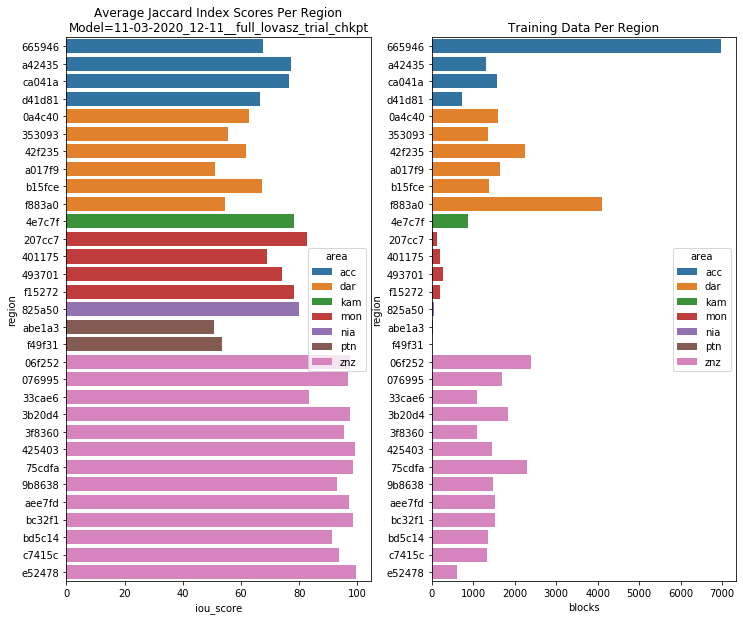

In [98]:
plt.subplots(nrows=1, ncols=2, figsize=(12,10))
plt.subplot(121)
sns.barplot(orient='h', y='region',
            x='iou_score', hue='area',dodge=False,
            data=area_region_scores.sort_values(by=['area','region']))
plt.title("Average Jaccard Index Scores Per Region\nModel=11-03-2020_12-11__full_lovasz_trial_chkpt")

plt.subplot(122)
sns.barplot(orient='h', y='region',
            x='blocks', hue='area',dodge=False,
            data=region_sizes.sort_values(by=['area','region']))
plt.title("Training Data Per Region")
plt.savefig('11-03-2020_12-11__full_lovasz_trial_chkpt_model_performance.png');